# Inicialização dataset - Task [001]

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [49]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [50]:
# print all the information about the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

,Unit
count,1281.000000
mean,10.177674
std,2.318850
min,0.000000
25%,9.400000
50%,10.100000
75%,10.500000
max,39.000000


In [51]:
# print all the information about the dataframe
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   Harmonize   100646 non-null  object 
 6   ABV         100646 non-null  float64
 7   Body        100646 non-null  object 
 8   Acidity     100646 non-null  object 
 9   Code        100646 non-null  object 
 10  Country     100646 non-null  object 
 11  RegionID    100646 non-null  int64  
 12  RegionName  100646 non-null  object 
 13  WineryID    100646 non-null  int64  
 14  WineryName  100646 non-null  object 
 15  Website     82779 non-null   object 
 16  Vintages    100646 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.1+ MB


,WineID,ABV,RegionID,WineryID
count,100646.000000,100646.000000,100646.000000,100646.000000
mean,150387.308755,13.268421,1738.085955,41316.599756
std,29095.984572,1.472526,495.235850,18359.726909
min,100001.000000,0.000000,1000.000000,10000.000000
25%,125183.250000,12.500000,1327.000000,24375.250000
50%,150374.500000,13.400000,1710.000000,41826.500000
75%,175591.750000,14.000000,2058.000000,57550.000000
max,200795.000000,50.000000,3750.000000,71840.000000


In [52]:
# print all the information about the dataframe
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WineName                   222 non-null    object 
 1   WineryName                 222 non-null    object 
 2   Description                221 non-null    object 
 3   Price                      222 non-null    object 
 4   Capacity                   222 non-null    object 
 5   Grape                      222 non-null    object 
 6   Secondary Grape Varieties  73 non-null     object 
 7   Closure                    222 non-null    object 
 8   Country                    222 non-null    object 
 9   Unit                       222 non-null    float64
 10  Characteristics            218 non-null    object 
 11  Per bottle / case / each   222 non-null    object 
 12  Type                       222 non-null    object 
 13  ABV                        222 non-null    object 

,Unit,Vintage
count,222.000000,222.000000
mean,10.445045,2019.094595
std,1.663978,2.542858
min,4.300000,2007.000000
25%,10.100000,2018.000000
50%,10.500000,2020.000000
75%,10.900000,2021.000000
max,21.800000,2022.000000


In [53]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [54]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

Price ['£9.99 per bottle' '£15.99 per bottle' '£12.49 per bottle'
 '£17.99 per bottle' '£300.00 per bottle' '£12.99 per bottle'
 '£80.00 per bottle' '£13.99 per bottle' '£8.99 per bottle'
 '£11.99 per bottle' '£46.99 per bottle' '£11.29 per bottle'
 '£22.99 per bottle' '£45.99 per bottle' '£49.99 per bottle'
 '£33.99 per bottle' '£23.99 per bottle' '£21.99 per bottle'
 '£42.99 per bottle' '£29.99 per bottle' '£39.99 per bottle'
 '£14.99 per bottle' '£16.99 per bottle' '£7.99 per bottle'
 '£18.99 per bottle' '£19.99 per bottle' '£10.99 per bottle'
 '£34.99 per bottle' '£43.99 per bottle' '£24.99 per bottle'
 '£35.99 per bottle' '£37.99 per bottle' '£99.99 per bottle'
 '£75.99 per bottle' '£79.00 per case' '£61.99 per bottle'
 '£57.99 per bottle' '£20.99 per bottle' '£44.99 per bottle'
 '£36.99 per bottle' '£69.99 per bottle' '£25.99 per bottle'
 '£6.99 per bottle' '£48.99 per bottle' '£13.00 per bottle'
 '£93.99 per bottle' '£26.99 per bottle' '£49.00 per case'
 '£59.94 per case' '£200.

In [55]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

Price ['£15.99 per bottle' '£17.99 per bottle' '£14.99 per bottle'
 '£12.99 per bottle' '£18.99 per bottle' '£16.99 per bottle'
 '£22.99 per bottle' '£29.99 per bottle' '£21.99 per bottle'
 '£34.99 per bottle' '£13.99 per bottle' '£11.29 per bottle'
 '£11.99 per bottle' '£9.99 per bottle' '£31.99 per bottle'
 '£26.99 per bottle' '£42.99 per bottle' '£37.99 per bottle'
 '£19.99 per bottle' '£32.99 per bottle' '£24.99 per bottle'
 '£79.99 per bottle' '£39.99 per bottle' '£54.99 per bottle'
 '£69.99 per bottle' '£33.99 per bottle' '£99.00 per bottle'
 '£84.99 per bottle' '£23.99 per bottle' '£188.99 per bottle'
 '£49.99 per bottle' '£64.99 per bottle' '£44.99 per bottle'
 '£85.00 per bottle' '£59.99 per bottle' '£12.49 per bottle'
 '£52.99 per bottle' '£30.99 per bottle' '£45.99 per bottle'
 '£89.99 per bottle' '£27.99 per bottle' '£7.99 per bottle'
 '£10.99 per bottle' '£169.99 per bottle' '£72.99 per bottle'
 '£20.99 per bottle' '£60.99 per bottle' '£75.99 per bottle'
 '£25.99 per bottl

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [56]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)	
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


       WineID           WineName  Type         Elaborate  \
31005  131027  Rosé Alcohol Free  Rosé  Assemblage/Blend   

                         Grapes  \
31005  ['Chardonnay', 'Merlot']   

                                               Harmonize  ABV           Body  \
31005  ['Beef', 'Pork', 'Game Meat', 'Rich Fish', 'Ve...  0.0  Medium-bodied   

      Acidity Code Country  RegionID RegionName  WineryID   WineryName  \
31005  Medium   FR  France      1327  Languedoc     25983  Pierre Zero   

                           Website  \
31005  https://www.pierre-zero.com   

                                                Vintages  
31005  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  
        Type_Dessert  Type_Dessert/Port  Type_Red  Type_Rosé  Type_Sparkling  \
0              False              False     False      False            True   
1              False              False      True      False           False   
2              False              False      True      False   

# Classification Dataset Preprocessing - Task [066]
### Normalizing Harmonize and grouping it into broader categories

In [57]:
#Count how many grapes in the column grapes are unique grapes are in a array
grapes = df2['Grapes'].str.split(',').explode().unique()

#Remove every "]"" and "[" and "," and "'" and remove spaces if they are in the first character or the last character
grapes = [grape.replace(']', '').replace('[', '').replace(',', '').replace("'", '').strip() for grape in grapes]

grapes2 = ['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Glera', 'Chenin Blanc', 'Castelão ', 'Malagousia', 'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus', 'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese', 'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah', 'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo', 'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre', 'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino', 'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage', 'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan', 'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional', 'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana', 'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro', 'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio', 'Fiano', 'Rondinella', 'Mauzac', 'Nebbiolo', 'Lambrusco Grasparossa', 'Pecorino', 'Negroamaro', 'Fernão Pires', 'Feteasca Alba', 'Zwieigelt', 'Grillo', 'Tinta Barroca', 'Furmint', 'Touriga Franca', 'Pedro Ximénez', 'Palomino', 'Viura', 'Montepulciano', 'Barbera', 'Malvasia', 'Arinto', 'Colombard', 'Sémillon', 'Jacquere', 'Pinot Blanc', 'Rkatsiteli', 'Syrah-Shiraz', 'Torrontes', 'Sauvignon Gris', 'Assyrtiko', 'Moscato', 'Rolle', 'Huxelrebe', 'Xarel-Lo', 'Niellucciu', 'Saperavi', 'Rara Neagra', 'Non Varietal', 'Muscat', 'Monastrell', 'Dolcetto', 'Black Muscat', 'Nerello', 'Roussanne', 'Tibouren', 'Grolleau', 'Inzolia', 'Falanghina', 'Aglianico']

# Create a new array of grapes where both of the grapes match
grapes = list(set(grapes) & set(grapes2))
print(grapes)

df2['Grapes'] = df2['Grapes'].apply(lambda x: ast.literal_eval(x))

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: [grape for grape in x if grape in grapes]
)

# Drop rows where the resulting 'Grapes' column is empty
df2 = df2[df2['Grapes'].str.len() > 0]

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: x[0]
)

# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)

['Pinot Meunier', 'Zinfandel', 'Palomino', 'Sémillon', 'Garnacha', 'Viura', 'Riesling', 'Monastrell', 'Vespaiola', 'Agiorgitiko', 'Grenache Blanc', 'Cinsault', 'Siegerrebe', 'Nebbiolo', 'Grolleau', 'Garganega', 'Sauvignon Gris', 'Gewürztraminer', 'Trincadeira', 'Rondinella', 'Pinot Grigio', 'Loureiro', 'Turbiana', 'Verdicchio', 'Barbera', 'Roussanne', 'Alvarinho', 'Rkatsiteli', 'Bacchus', 'Fernão Pires', 'Primitivo', 'Arinto', 'Aglianico', 'Verdejo', 'Touriga Franca', 'Merlot', 'Vermentino', 'Greco', 'Aligoté', 'Pecorino', 'Alicante Bouschet', 'Macabeo', 'Sauvignon Blanc', 'Fiano', 'Marsanne', 'Chardonnay', 'Corvina', 'Viognier', 'Cortese', 'Touriga Nacional', 'Saperavi', 'Tinta Roriz', 'Inzolia', 'Grillo', 'Pinot Blanc', 'Feteasca Alba', 'Pinot Gris', 'Cabernet Franc', 'Colombard', 'Malvasia', 'Falanghina', 'Chenin Blanc', 'Negroamaro', 'Assyrtiko', 'Dolcetto', 'Huxelrebe', 'Pinotage', 'Tinta Barroca', 'Airen', 'Furmint', 'Sangiovese', 'Grenache', 'Nerello Mascalese', 'Tempranillo', '

### Normalizing the rest of the columns

In [58]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity', 'Grapes'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity', 'Grapes'])

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Harmonize'])
encoded_df = encoded_df.dropna()
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

0.0
48.0


### Boxplot

<Axes: xlabel='ABV'>

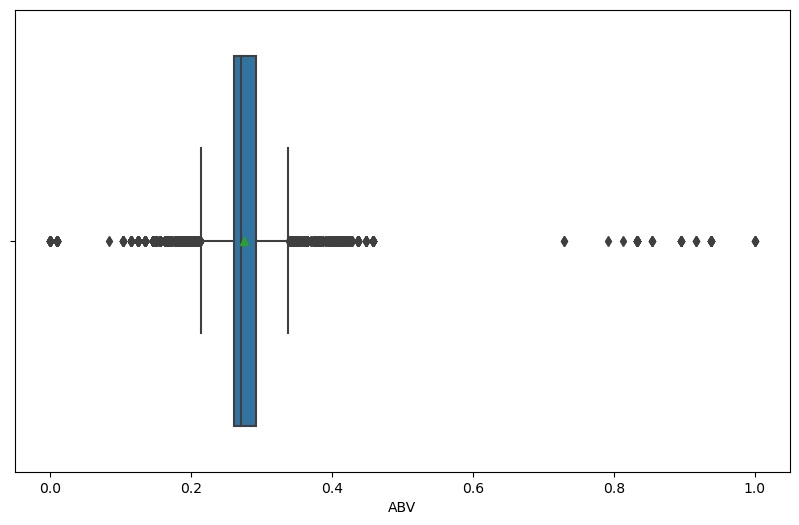

In [59]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

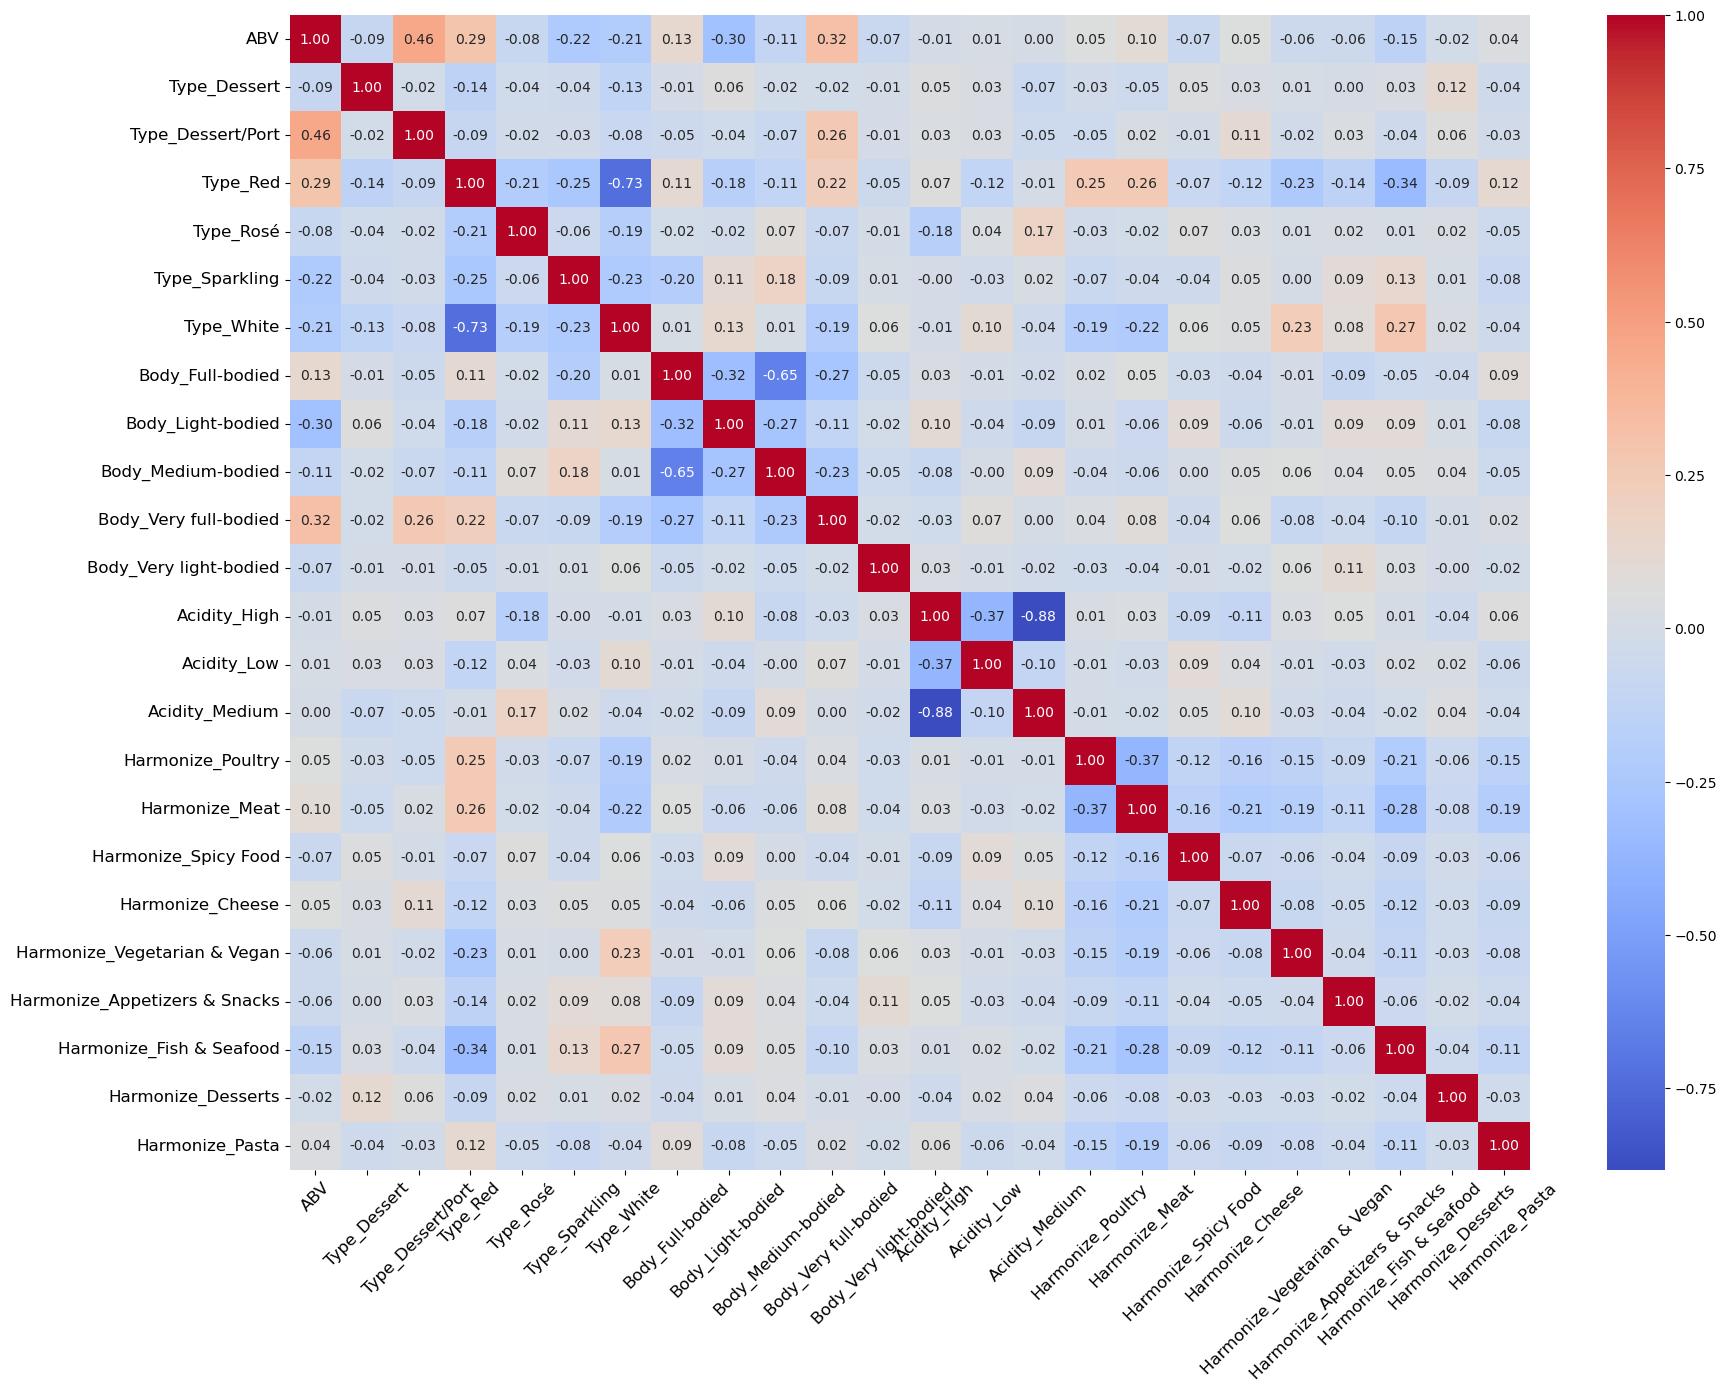

In [60]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
drop_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
drop_columns = drop_columns.append(encoded_df.columns[encoded_df.columns.str.startswith('Grapes_')])
matrix_df = encoded_df.drop(columns=drop_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

Generating PCA plot for label column: Harmonize_Poultry


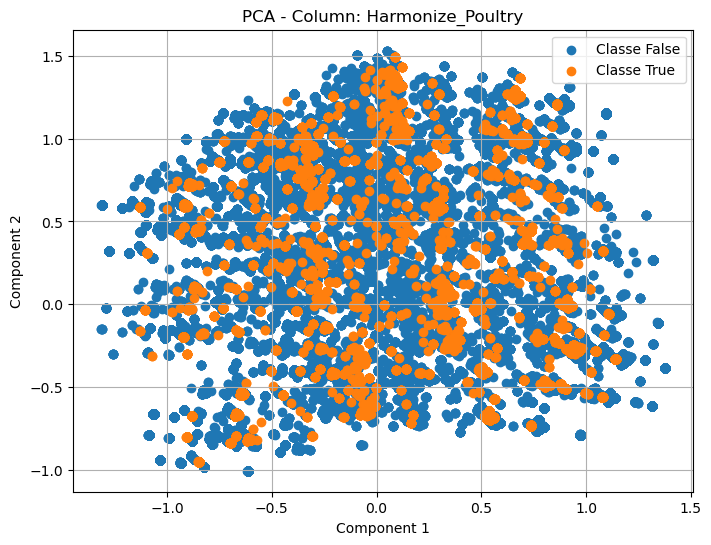

Generating PCA plot for label column: Harmonize_Meat


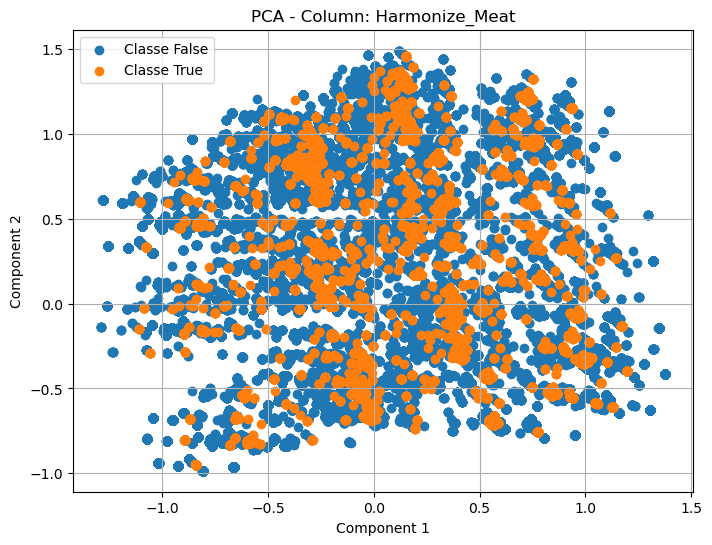

Generating PCA plot for label column: Harmonize_Spicy Food


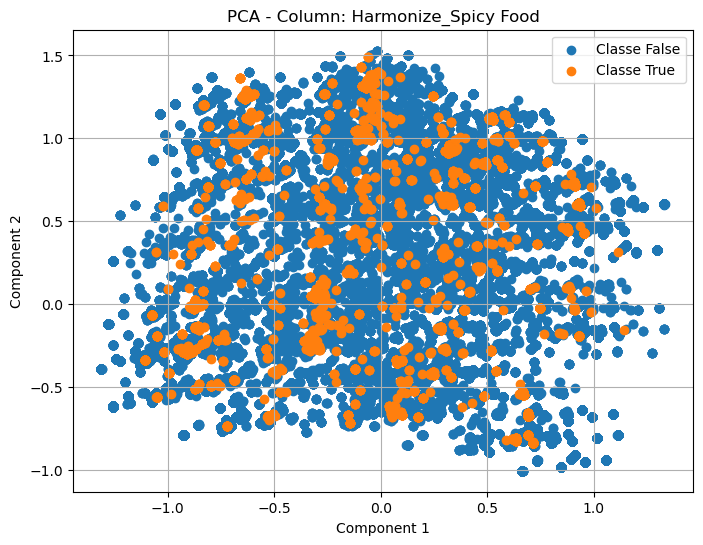

Generating PCA plot for label column: Harmonize_Cheese


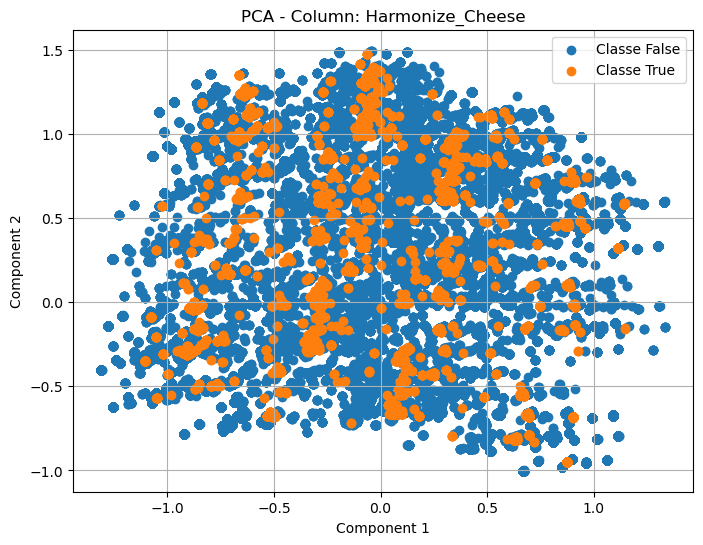

Generating PCA plot for label column: Harmonize_Vegetarian & Vegan


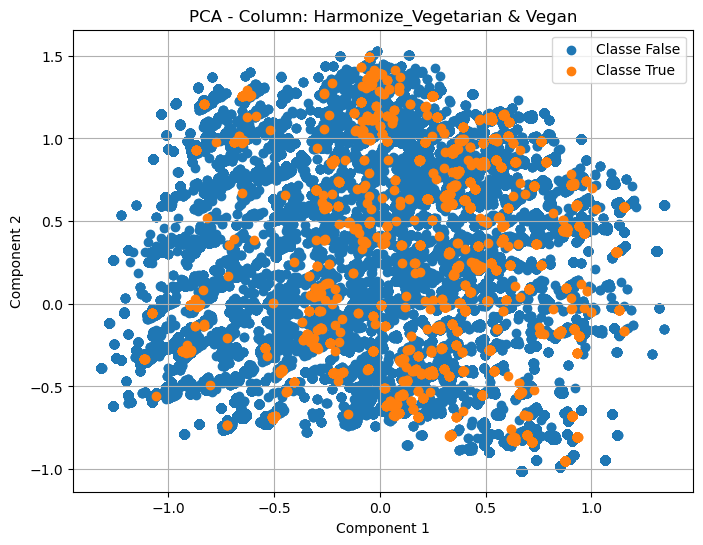

Generating PCA plot for label column: Harmonize_Appetizers & Snacks


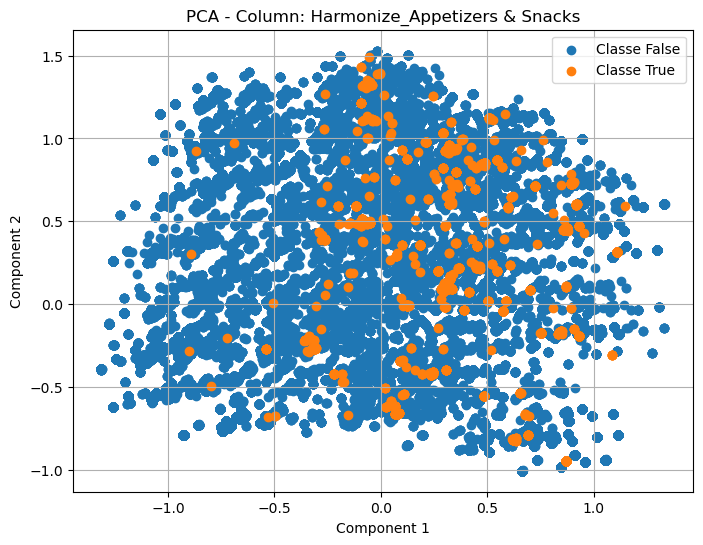

Generating PCA plot for label column: Harmonize_Fish & Seafood


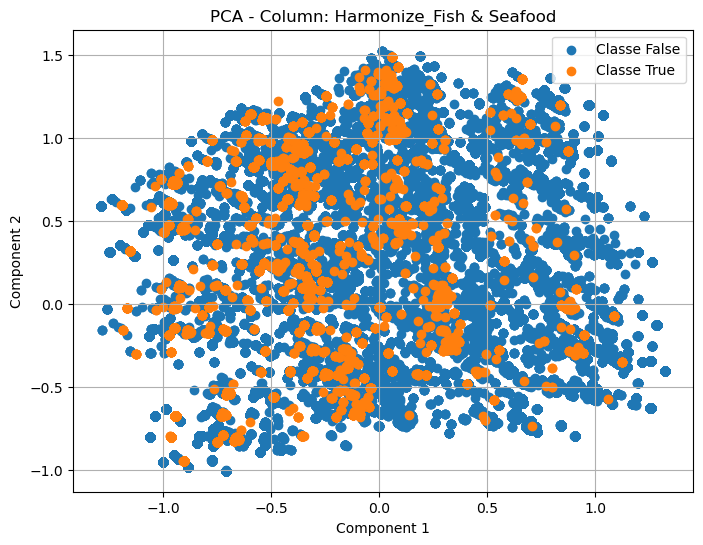

Generating PCA plot for label column: Harmonize_Desserts


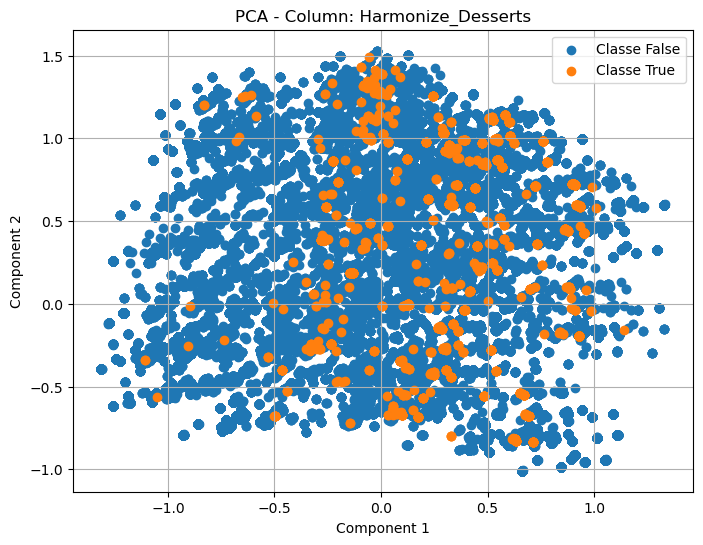

Generating PCA plot for label column: Harmonize_Pasta


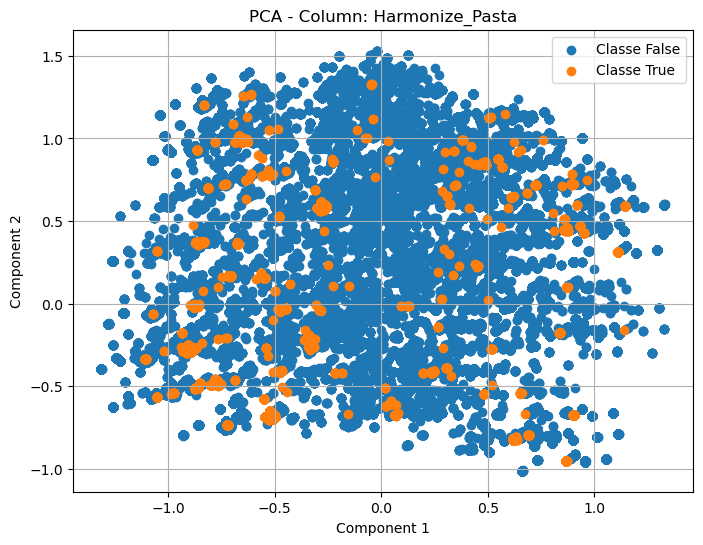

In [61]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()

When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

# GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Type Classification

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   1.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   1.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   1.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   1.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  12.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  12.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  12.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  12.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  12.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=  25.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


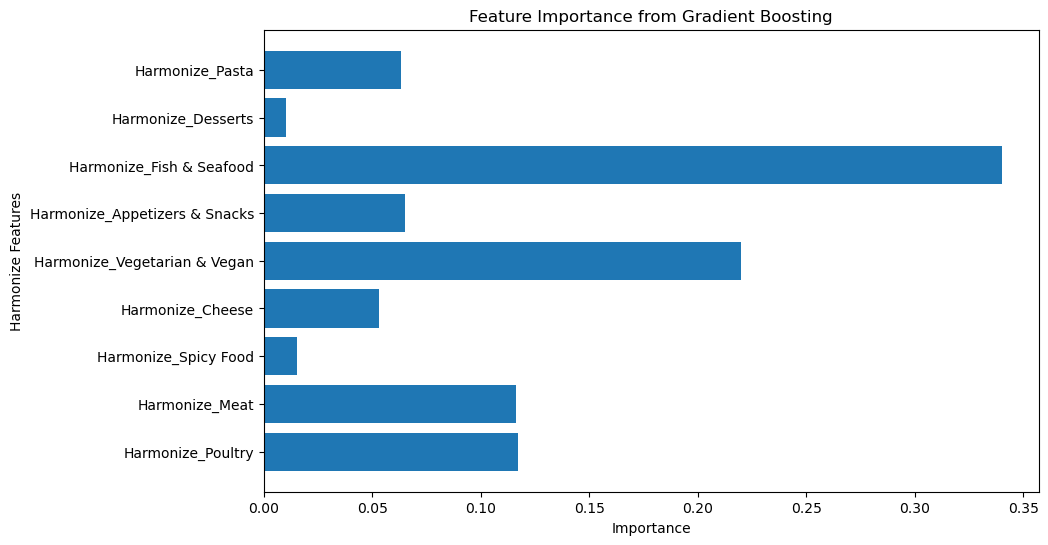

In [63]:
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]

X = encoded_df[harmonize_columns]
y = encoded_df[type_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#####
# Encode string labels into integers

y_train_labels = y_train.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Type_", "", regex=True)

label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)

#####
# Define the parameter grid
param_grid = {
    'n_estimators': [5, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_labels)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions using the best model
gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

# Evaluate the best model
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

print("Classification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

# Feature Importance of the Best Model
feature_importances = best_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(harmonize_columns, feature_importances, align="center")
plt.xlabel("Importance")
plt.ylabel("Harmonize Features")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

In [64]:
print("Best Parameters:", grid_search.best_params_)
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Validation Accuracy: 0.6501277623339792
Gradient Boosting Test Accuracy: 0.6482612993081139


Upon analyzing the results, it is evident that the model’s accuracy is relatively modest, at approximately 65%. However, for the objectives of our project, this level of accuracy is acceptable. Despite not being close to 100%, the consistency between the validation and test accuracy values indicates that the model does not exhibit significant overfitting. This alignment suggests that the model has generalized reasonably well to unseen data within the scope of our study.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  56.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  56.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  56.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time= 2.2min
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time= 2.2min
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time= 2.2min
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time= 1.2min
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time= 1.2min
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time= 1.2min
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=10; total time= 2.2min
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=30; total time= 6.7min
[CV] END ....learning_rate=0.1, max_depth=3, n_e

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


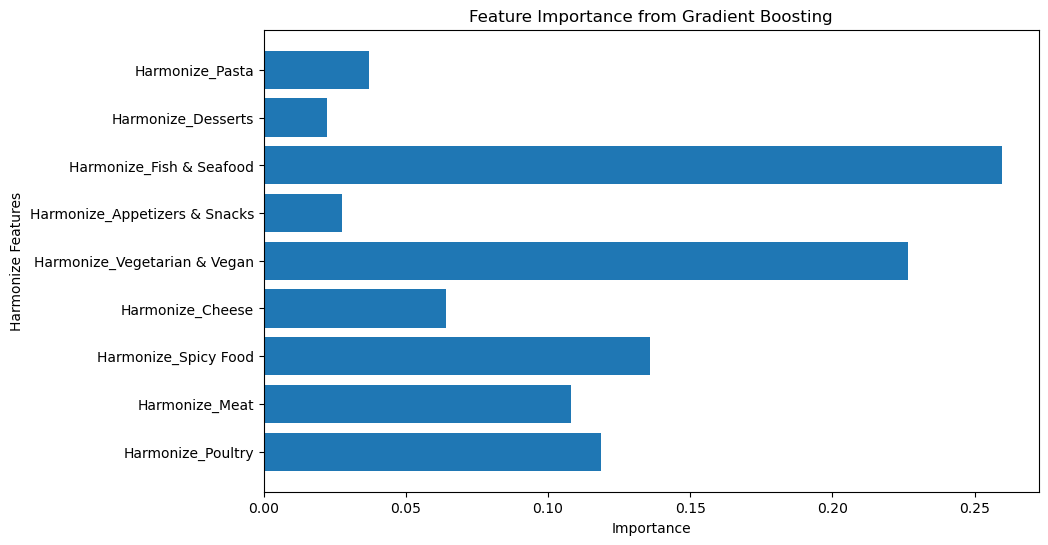

In [65]:
grape_columns = [col for col in encoded_df.columns if col.startswith('Grapes_')]

X = encoded_df[harmonize_columns]
y = encoded_df[grape_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#####
# Encode string labels into integers

y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)
#####

# Define the parameter grid with fewer options for faster execution
param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform RandomizedSearchCV with reduced folds
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_labels)

# Get the best model and its parameters
best_model = random_search.best_estimator_

# Predictions using the best model
gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("\nClassification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

# Feature Importance of the Best Model
feature_importances = best_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(harmonize_columns, feature_importances, align="center")
plt.xlabel("Importance")
plt.ylabel("Harmonize Features")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

In [66]:
print("\nBest Parameters:", random_search.best_params_)
print("\nGradient Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))


Best Parameters: {'n_estimators': 30, 'max_depth': 3, 'learning_rate': 0.1}

Gradient Boosting Validation Accuracy: 0.2486732373009856
Gradient Boosting Test Accuracy: 0.24732680384580824


Upon analyzing the results, it is evident that the accuracy of the grape classification is relatively poor, around 25%. This suggests a low correlation between the distinct meals and the grape varieties. Additionally, this result may imply that the current classification model is not well-suited for the dataset. Nevertheless, the observation that the validation and test accuracies are nearly identical is a positive sign, suggesting that the model is not overfitting and has maintained consistency across unseen data.